<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

In [4]:
df.dropna(subset=['AVG_READING_4_SCORE'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Predictor for Test: **<Math/Reading for 4/8 grade>**   (Ex. Math for 8th grade)

**(hit `Enter` to edit)**

Predictor Score in the questions refers to the predictor variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [5]:
print(df['YEAR'].value_counts())
print(len(df['YEAR'].value_counts()))
print("14 different years")

2019    53
2017    53
2015    53
2013    53
2011    53
2009    53
2007    53
2005    53
2003    53
2002    46
1992    43
1998    42
1994    41
2000     1
Name: YEAR, dtype: int64
14
14 different years


Let's compare Michigan to Ohio. Which state has the higher average predictor score across all years?

In [6]:
MICH = df.loc[df["STATE"] == 'MICHIGAN', "AVG_READING_4_SCORE"]
OHIO = df.loc[df["STATE"] == 'OHIO', "AVG_READING_4_SCORE"]
print(MICH.mean())
print(OHIO.mean())
print("Ohio has higher average 4th grade reading scores")

217.83333333333334
223.1818181818182
Ohio has higher average 4th grade reading scores


Find the average for your pedictor score across all states in 2019

In [7]:
dataframe = df[['AVG_READING_4_SCORE','YEAR']]
result = dataframe[dataframe["YEAR"] == 2019]

In [8]:
print(result.mean())
print("The average score for 4th grade raeding in 2019 across all state is 219.792453")

AVG_READING_4_SCORE     219.792453
YEAR                   2019.000000
dtype: float64
The average score for 4th grade raeding in 2019 across all state is 219.792453


Find the maximum predictor score for every state. Hint: there's a function that allows you to do this easily

In [9]:
dataframe1 = df[['AVG_READING_4_SCORE']]
print(dataframe.max())
print("The max score is 237.0")

AVG_READING_4_SCORE     237.0
YEAR                   2019.0
dtype: float64
The max score is 237.0


<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (your chosen predictor). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [10]:
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']

Final feature list: **<SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT\>**

Feature selection justification: **<Thie feature allows to see the date on an individual level, which is less subject to the size of the state\>**

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen predictor with any features you chose

**Visualization 1**

Text(0.5, 1.0, '4th grade reading score over time')

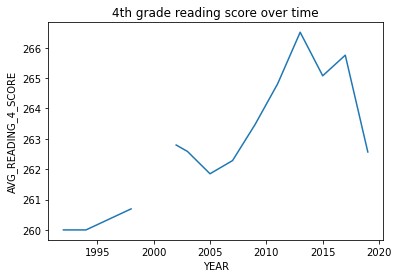

In [11]:
df.groupby('YEAR').AVG_READING_8_SCORE.mean().plot()
plt.ylabel('AVG_READING_4_SCORE')
plt.title('4th grade reading score over time')

**< This graph examines the relationship between the 4th grade reading score and the time. We can see that the score has be rising until arounf 2013, and since then, it falls.>**

**Visualization 2**

Text(0.5, 1.0, 'Distribution of 4th grade reading scores')

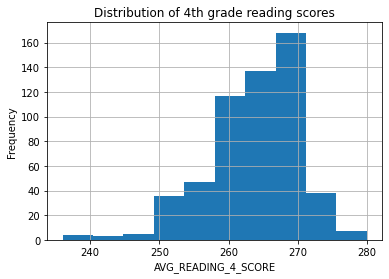

In [12]:
df.AVG_READING_8_SCORE.hist()
plt.xlabel('AVG_READING_4_SCORE')
plt.ylabel('Frequency')
plt.title('Distribution of 4th grade reading scores')

**< This is the distribution for the 4th grade raeding scores, the majority of the people scored between 260-270; most people got around 270 points.>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [13]:
from sklearn.model_selection import train_test_split

In [21]:
X = df[['TOTAL_REVENUE','ENROLL_4','SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT','YEAR']].dropna()
y = df.loc[X.index]['AVG_READING_4_SCORE']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.4, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **< REGRESSION >**

In [23]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [24]:
# create your model here
model = LinearRegression()

In [25]:
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

In [28]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

ValueError: plot_confusion_matrix only supports classifiers

Text(0, 0.5, 'Reading 4 score')

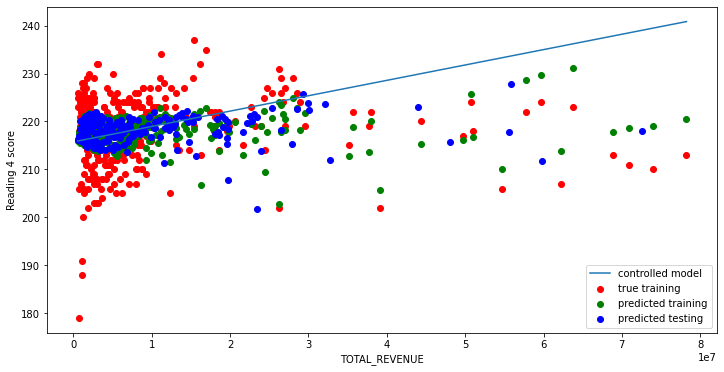

In [27]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'TOTAL_REVENUE'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Reading 4 score')

<h2> Summary </h2>

**< In this checkpoint, I cleaned the data by renaming the columns and dropping all the NaN for my relavant predictor, which is 4th grade reading. I then used a linear model make predictions. The predicted training and predicted testing are all close to the controlled model. They are also within the true training.>**